In [ ]:
import pandas as pd
import math
import numpy as np
from itertools import combinations

In [ ]:
TagsData=pd.read_csv("/content/drive/MyDrive/Filtags.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PosData=pd.read_csv("/content/drive/MyDrive/Filpos.csv")

 # **Analyzing PosData**# 

In [ ]:
PosData["Accepted"].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1057385    False
1057386    False
1057387    False
1057388    False
1057389    False
Name: Accepted, Length: 1057390, dtype: bool

In [ ]:
PosData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057390 entries, 0 to 1057389
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Body      1055188 non-null  object 
 1   Tags      432615 non-null   object 
 2   Id        1055188 non-null  float64
 3   Accepted  1057390 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 32.3+ MB


In [ ]:
PosData=PosData.dropna(axis=0,subset=['Tags'])

In [ ]:
PosData['Tags'].isnull()

0          False
1          False
5          False
7          False
13         False
           ...  
1057376    False
1057379    False
1057381    False
1057385    False
1057388    False
Name: Tags, Length: 432615, dtype: bool

#**Extracting the Tags and finiding counts**#

In [ ]:
# PosData["Tags"].str.replace('<',',')
PosData["Tags"]=PosData["Tags"].str.replace('>',',')

In [ ]:
PosData["Tags"]=PosData["Tags"].str.replace('<','')

In [ ]:
PosData["Tags"]=PosData["Tags"].str.strip(',')

In [ ]:
PosData= PosData.assign(Tags=PosData.Tags.str.split(",")).explode("Tags")

In [ ]:
PosData.rename(columns={"Tags":"TagName"},inplace=True)

In [ ]:
count=PosData["TagName"].value_counts()
countdict=count.to_dict()
PosData['Counts'] = PosData['TagName'].map(countdict) 

In [ ]:
len(PosData.TagName.unique())

5437

In [ ]:
PosData[PosData["Counts"]>30].head(50)

In [ ]:
PosData["IsPopular"]=PosData['Counts']>=30

In [ ]:
PosData=PosData.drop(PosData[PosData.IsPopular==False].index)

In [ ]:
PosData

,Body,TagName,Id,Accepted,Counts,IsPopular
0,<p>A Vista virtual machine I use only has a 10...,windows,1.0,1,44603,True
0,<p>A Vista virtual machine I use only has a 10...,disk-space,1.0,1,781,True
0,<p>A Vista virtual machine I use only has a 10...,winsxs,1.0,1,48,True
5,<p>What is the difference between the two supe...,linux,29.0,1,49752,True
5,<p>What is the difference between the two supe...,unix,29.0,1,3767,True
...,...,...,...,...,...,...
1057388,"<p>Based on the following question:\n<a href=""...",windows,1506449.0,0,44603,True
1057388,"<p>Based on the following question:\n<a href=""...",partitioning,1506449.0,0,6069,True
1057388,"<p>Based on the following question:\n<a href=""...",security,1506449.0,0,4619,True
1057388,"<p>Based on the following question:\n<a href=""...",windows-explorer,1506449.0,0,3229,True


In [ ]:
Cooccurantdata=PosData.groupby('Id')['TagName'].apply(lambda x: ','.join(x))
# Cooccurantdf=pd.DataFrame(Cooccurantdata.size().reset_index(name = "Tags"))
Cooccurantdf=pd.DataFrame(Cooccurantdata.reset_index(name='Tags'))

In [ ]:
# Cooccurantdf['CooccurantTags']=
Cooccurantdf['CooccurantPairs']=Cooccurantdf['Tags'].str.split(',').apply(lambda r: list(combinations(r, 2)))

In [ ]:
#  Cooccurantdf.assign(CooccurantPairs=Cooccurantdf.CooccurantPairs.str.split(",")).explode("CooccurantPairs")
Cooccurantdf=Cooccurantdf.explode('CooccurantPairs')

In [ ]:
cooccurantlist=Cooccurantdf['CooccurantPairs'].tolist()

#**Finding Duplicate pairs tuples of Co-occurant tags**#

In [ ]:
Cooccurantdf=Cooccurantdf[Cooccurantdf["CooccurantPairs"].isnull()==False]
Cooccurantdf['IsDuplicatePair']=[(x[1],x[0]) in Cooccurantdf['CooccurantPairs'] for x in Cooccurantdf['CooccurantPairs']]
Cooccurantdf[Cooccurantdf['IsDuplicatePair']==True]


,Id,Tags,CooccurantPairs,IsDuplicatePair


# **Co-occurant pairs count Google distance and Similarity**#

In [ ]:
count1=Cooccurantdf["CooccurantPairs"].value_counts()
countdict1=count1.to_dict()
Cooccurantdf['CooccurantPairsCount'] = Cooccurantdf['CooccurantPairs'].map(countdict1) 

In [ ]:
Cooccurantdf.head(15)

,Id,Tags,CooccurantPairs,IsDuplicatePair,CooccurantPairsCount
0,1.0,"windows,disk-space,winsxs","(windows, disk-space)",False,116
0,1.0,"windows,disk-space,winsxs","(windows, winsxs)",False,18
0,1.0,"windows,disk-space,winsxs","(disk-space, winsxs)",False,6
1,29.0,"linux,unix,sudo","(linux, unix)",False,1326
1,29.0,"linux,unix,sudo","(linux, sudo)",False,455
1,29.0,"linux,unix,sudo","(unix, sudo)",False,50
2,37.0,"mac,crash,boot-camp","(mac, crash)",False,29
2,37.0,"mac,crash,boot-camp","(mac, boot-camp)",False,216
2,37.0,"mac,crash,boot-camp","(crash, boot-camp)",False,3
3,46.0,"windows,boot,windows-vista,uac,elevation","(windows, boot)",False,1476


In [ ]:
Cooccurantdf=Cooccurantdf[Cooccurantdf['CooccurantPairsCount']>30]
Cooccurantdf.head(15)

,Id,Tags,CooccurantPairs,IsDuplicatePair,CooccurantPairsCount
0,1.0,"windows,disk-space,winsxs","(windows, disk-space)",False,116
1,29.0,"linux,unix,sudo","(linux, unix)",False,1326
1,29.0,"linux,unix,sudo","(linux, sudo)",False,455
1,29.0,"linux,unix,sudo","(unix, sudo)",False,50
2,37.0,"mac,crash,boot-camp","(mac, boot-camp)",False,216
3,46.0,"windows,boot,windows-vista,uac,elevation","(windows, boot)",False,1476
3,46.0,"windows,boot,windows-vista,uac,elevation","(windows, windows-vista)",False,565
3,46.0,"windows,boot,windows-vista,uac,elevation","(windows, uac)",False,192
3,46.0,"windows,boot,windows-vista,uac,elevation","(boot, windows-vista)",False,41
3,46.0,"windows,boot,windows-vista,uac,elevation","(windows-vista, uac)",False,32


In [ ]:
TagsDataCount=dict(zip(PosData.TagName,PosData.Counts))
TagsPairsDataCount=dict(zip(Cooccurantdf['CooccurantPairs'],Cooccurantdf['CooccurantPairsCount']))
TotalTags=len(PosData.TagName.unique())
TotalTags

2650

In [ ]:
Cooccurantdf=Cooccurantdf[Cooccurantdf["CooccurantPairs"].isnull()==False]

In [ ]:
Cooccurantdf["CooccurantPairs"].isnull()==False

0         True
1         True
1         True
1         True
2         True
          ... 
402540    True
402540    True
402540    True
402540    True
402540    True
Name: CooccurantPairs, Length: 774772, dtype: bool

In [ ]:
tup2=Cooccurantdf['CooccurantPairs'].tolist()#Cooccurantdf['CooccurantPairs'].unique().tolist()[:3]
tup2

[('windows', 'disk-space'),
 ('linux', 'unix'),
 ('linux', 'sudo'),
 ('unix', 'sudo'),
 ('mac', 'boot-camp'),
 ('windows', 'boot'),
 ('windows', 'windows-vista'),
 ('windows', 'uac'),
 ('boot', 'windows-vista'),
 ('windows-vista', 'uac'),
 ('keyboard', 'keymap'),
 ('keyboard', 'function-keys'),
 ('windows-vista', 'windows-explorer'),
 ('windows', 'pdf'),
 ('linux', 'ubuntu'),
 ('linux', 'virtual-machine'),
 ('linux', 'apache-http-server'),
 ('linux', 'vmware-player'),
 ('ubuntu', 'virtual-machine'),
 ('ubuntu', 'apache-http-server'),
 ('ubuntu', 'vmware-player'),
 ('virtual-machine', 'vmware-player'),
 ('windows', 'services'),
 ('ubuntu', 'laptop'),
 ('windows', 'firefox'),
 ('windows', 'pdf'),
 ('firefox', 'pdf'),
 ('firefox', 'browser-addons'),
 ('security', 'disk-encryption'),
 ('macos', 'boot'),
 ('macos', 'macbook'),
 ('boot', 'macbook'),
 ('linux', 'linux-distributions'),
 ('windows', 'multiple-monitors'),
 ('windows', 'display'),
 ('multiple-monitors', 'display'),
 ('windows', '

In [ ]:
def googleDistance(x):
  dist=0
  for i in x:
    for j in x:
        if i!=j:         
          dist=(max(math.log10(TagsDataCount[i]),math.log10(TagsDataCount[j]))-math.log10(TagsPairsDataCount[x]))
          dist=dist/(math.log10(TotalTags)-min(math.log10(TagsDataCount[i]),math.log10(TagsDataCount[j])))
          return dist

In [ ]:
Cooccurantdf['cooccurantPairsgoogleDistance']=[googleDistance(x) for x in Cooccurantdf['CooccurantPairs']]

In [ ]:
def cooccurantPairSim(dist):
  sim=0
  sim=(math.exp(dist))/(1+math.exp(dist))
  return sim

In [ ]:
Cooccurantdf['cooccurantPairsSim']=[cooccurantPairSim(x) for x in Cooccurantdf['cooccurantPairsgoogleDistance']]

**Co occurant pairs mostly have similarity above 0.9**



In [ ]:
Cooccurantdf=Cooccurantdf[Cooccurantdf['cooccurantPairsSim']>0.7]
TotalSimilarity=sum(Cooccurantdf['cooccurantPairsSim'])

#**Co-occurant Score**#

In [ ]:
Cooccurantpairs=Cooccurantdf['CooccurantPairs'].unique().tolist()#Cooccurantdf['CooccurantPairs'].unique().tolist()[:3]

In [ ]:
def SimilarityPairs(tag):
  sim=[]
  for x in Cooccurantpairs:
    
    if x[0]==tag or x[1]==tag:
      sim.append(x)
  return sim

In [ ]:
def TotalSim(simpairs):
 sum=0
 for y in simpairs:
  sum+=coocsimdict[y]
 return sum

In [ ]:
coocsimdict=dict(zip(Cooccurantdf.CooccurantPairs,Cooccurantdf.cooccurantPairsSim))
coocsimdict[('linux', 'sudoers')]

0.9037405566300888

In [ ]:
Cooccurantdf['TotalSimOfOther']=[TotalSim(SimilarityPairs(j)) for i,j in  Cooccurantdf['CooccurantPairs']]

In [ ]:
Cooccurantdf['cooccurrentScore']=Cooccurantdf['cooccurantPairsSim']/Cooccurantdf['TotalSimOfOther']

In [ ]:
Cooccurantdf=Cooccurantdf[Cooccurantdf['CooccurantPairsCount']>30]
Cooccurantdf['CooccurantPairsCount']<30

0         False
1         False
1         False
2         False
3         False
          ...  
402538    False
402538    False
402538    False
402540    False
402540    False
Name: CooccurantPairsCount, Length: 463648, dtype: bool

In [ ]:
Cooccurantdf

,Id,Tags,CooccurantPairs,IsDuplicatePair,CooccurantPairsCount,cooccurantPairsgoogleDistance,cooccurantPairsSim,TotalSimOfOther,cooccurrentScore
0,1.0,"windows,disk-space,winsxs","(windows, disk-space)",False,116,4.871714,0.992398,9.853084,0.100720
1,29.0,"linux,unix,sudo","(linux, sudo)",False,455,4.590308,0.989952,12.441335,0.079570
1,29.0,"linux,unix,sudo","(unix, sudo)",False,50,4.226079,0.985601,12.441335,0.079220
2,37.0,"mac,crash,boot-camp","(mac, boot-camp)",False,216,3.054837,0.954991,11.621885,0.082172
3,46.0,"windows,boot,windows-vista,uac,elevation","(windows, uac)",False,192,3.944939,0.981015,8.574560,0.114410
...,...,...,...,...,...,...,...,...,...
402538,1506442.0,"virtual-machine,vmware,vmware-workstation","(virtual-machine, vmware)",False,422,4.323908,0.986925,13.757619,0.071737
402538,1506442.0,"virtual-machine,vmware,vmware-workstation","(virtual-machine, vmware-workstation)",False,212,2.969467,0.951176,10.732706,0.088624
402538,1506442.0,"virtual-machine,vmware,vmware-workstation","(vmware, vmware-workstation)",False,72,2.945755,0.950062,10.732706,0.088520
402540,1506449.0,"windows,partitioning,security,windows-explorer...","(windows, efi)",False,42,3.772883,0.977531,10.888438,0.089777


In [ ]:
meancooccurrentScore=Cooccurantdf['cooccurrentScore'].mean()
Cooccurantdf=Cooccurantdf[Cooccurantdf['cooccurrentScore']>meancooccurrentScore]

In [ ]:
TagsData[TagsData['TagName']=='windows']

,Id,TagName,Count,ExcerptPostId,WikiPostId
8,211,windows,44603,183765.0,183049.0


In [ ]:
TagsDataDict=dict(zip(TagsData.TagName,TagsData.Id))
Cooccurantdf['PairTagId1']=[TagsDataDict[i] for i,j in Cooccurantdf['CooccurantPairs']]
Cooccurantdf['PairTagId2']=[TagsDataDict[j] for i,j in Cooccurantdf['CooccurantPairs']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Cooccurantdf.to_excel (r'C:\Users\export_dataframe.xlsx', index = False, header=False,columns=['PairTagId1','PairTagId2'])

# **Infomap retrieving groups**

In [ ]:
dict1=dict(zip(Cooccurantdf.CooccurantPairs,Cooccurantdf.cooccurrentScore))
dict1

{('windows', 'disk-space'): 2.145492364573869e-06,
 ('linux', 'sudo'): 2.1402048295026915e-06,
 ('unix', 'sudo'): 2.1307973125644505e-06,
 ('mac', 'boot-camp'): 2.0646208747548646e-06,
 ('windows', 'uac'): 2.120883171671879e-06,
 ('windows-vista', 'uac'): 2.088447445260218e-06,
 ('keyboard', 'keymap'): 1.7876831576936413e-06,
 ('keyboard', 'function-keys'): 1.7587603147829634e-06,
 ('linux', 'vmware-player'): 2.1269103913257575e-06,
 ('ubuntu', 'vmware-player'): 2.0917578211804394e-06,
 ('virtual-machine', 'vmware-player'): 1.9501600040225062e-06,
 ('windows', 'services'): 2.1459207143055756e-06,
 ('firefox', 'browser-addons'): 1.98094061550939e-06,
 ('security', 'disk-encryption'): 2.0249908988297856e-06,
 ('macos', 'macbook'): 2.1556661543215386e-06,
 ('boot', 'macbook'): 2.161325295049538e-06,
 ('linux', 'linux-distributions'): 1.974423789742862e-06,
 ('windows', 'windows-update'): 2.1618992957159835e-06,
 ('mac', 'itunes'): 2.1522783425183445e-06,
 ('itunes', 'mp3'): 2.002202333617

In [ ]:
Groupsdf=pd.read_excel('/content/drive/MyDrive/module2.xlsx')


In [ ]:
Groupsdf.head()

,Nodes
0,439 1 0.0445909
1,211 1 0.0409073
2,18441 1 0.0228033
3,16221 1 0.00551298
4,8488 1 0.00403844


In [ ]:
Groupsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nodes   1396 non-null   object
dtypes: object(1)
memory usage: 11.0+ KB


In [ ]:
Groupsdf[['Nodes','Module','Affinity']] = Groupsdf['Nodes'].str.split(' ',2,expand=True)

In [ ]:
Groupsdf['Nodes']=Groupsdf['Nodes'].astype('int64')

In [ ]:
tagsdict=dict(zip(TagsData.Id.tolist(),TagsData.TagName.tolist()))
Groupsdf['Tags']=[tagsdict[x] for x in Groupsdf['Nodes']]

In [ ]:
Groupsdf[Groupsdf['Module']=='30']

,Nodes,Module,Affinity,Tags
1293,1803,30,0.00233307,git
1294,2446,30,0.000390563,svn
1295,4012,30,0.000240998,github
1296,4261,30,0.000127667,repository
1297,1336,30,0.000117912,version-control
1298,16667,30,8.45279e-05,git-bash
1299,1184,30,7.50489e-05,tortoise-svn
1300,17656,30,5.15459e-05,gitlab
1301,6196,30,2.81834e-05,msysgit


In [ ]:
TagsCount=TagsData[TagsData.Count<100]
TagsCount3=TagsData[(TagsData.Count>=50) & (TagsData.Count<=5000)]
TagsCount4=TagsData[TagsData.Count>30]

In [ ]:
TagsCount3

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,203,firmware,399,392824.0,392823.0
1,204,upgrade,1145,320795.0,320794.0
4,207,video,4867,256215.0,256214.0
5,208,motherboard,3893,257030.0,257029.0
6,209,bios,3814,278912.0,278911.0
...,...,...,...,...,...
5291,19937,npm,102,NaN,NaN
5307,19959,visual-studio-2019,98,NaN,NaN
5310,19964,kubernetes,201,NaN,NaN
5318,19991,windows-10-v1903,79,NaN,NaN


In [ ]:
TagsCount2=TagsData[TagsData.Count>100]

In [ ]:
TagsCount2

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,203,firmware,399,392824.0,392823.0
1,204,upgrade,1145,320795.0,320794.0
2,205,networking,27805,244736.0,244735.0
3,206,audio,5864,257013.0,257012.0
4,207,video,4867,256215.0,256214.0
...,...,...,...,...,...
5221,19751,mikrotik-routeros,101,NaN,NaN
5222,19752,synaptics-touchpad,145,1360386.0,1360385.0
5244,19805,macos-mojave,256,1371472.0,1371471.0
5291,19937,npm,102,NaN,NaN


In [ ]:
PopularTagsData=TagsData[TagsData["Count"]>30]

In [ ]:
PopularTagsData

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,203,firmware,399,392824.0,392823.0
1,204,upgrade,1145,320795.0,320794.0
2,205,networking,27805,244736.0,244735.0
3,206,audio,5864,257013.0,257012.0
4,207,video,4867,256215.0,256214.0
...,...,...,...,...,...
5294,19942,windows-server-2019,48,1413970.0,1413969.0
5307,19959,visual-studio-2019,98,NaN,NaN
5310,19964,kubernetes,201,NaN,NaN
5318,19991,windows-10-v1903,79,NaN,NaN


In [ ]:
PopularTagsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 0 to 5324
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2608 non-null   int64  
 1   TagName        2608 non-null   object 
 2   Count          2608 non-null   int64  
 3   ExcerptPostId  1936 non-null   float64
 4   WikiPostId     1936 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 122.2+ KB


# **Entropy for concepts**

In [ ]:
cooccurantscoredict=dict(zip(Cooccurantdf.CooccurantPairs,Cooccurantdf.cooccurrentScore))
cooccurantscoredict[('ubuntu', 'sd-card')]

2.1449844108035075e-06

In [ ]:
CooccurantPairsList=Cooccurantdf['CooccurantPairs'].unique().tolist()
CooccurantPairsList

[('windows', 'disk-space'),
 ('linux', 'sudo'),
 ('unix', 'sudo'),
 ('mac', 'boot-camp'),
 ('windows', 'uac'),
 ('windows-vista', 'uac'),
 ('keyboard', 'keymap'),
 ('keyboard', 'function-keys'),
 ('linux', 'vmware-player'),
 ('ubuntu', 'vmware-player'),
 ('virtual-machine', 'vmware-player'),
 ('windows', 'services'),
 ('firefox', 'browser-addons'),
 ('security', 'disk-encryption'),
 ('macos', 'macbook'),
 ('boot', 'macbook'),
 ('linux', 'linux-distributions'),
 ('windows', 'windows-update'),
 ('mac', 'itunes'),
 ('itunes', 'mp3'),
 ('windows', 'printer'),
 ('ubuntu', 'printer'),
 ('itunes', 'music'),
 ('windows', 'logging'),
 ('windows', 'resolution'),
 ('windows', 'desktop-customization'),
 ('multiple-monitors', 'resolution'),
 ('multiple-monitors', 'desktop-customization'),
 ('windows', 'flash'),
 ('windows', 'cpu-usage'),
 ('linux', 'flash'),
 ('linux', 'cpu-usage'),
 ('firefox', 'flash'),
 ('linux', 'gnome'),
 ('linux', 'microphone'),
 ('windows-xp', 'user-accounts'),
 ('macos', 't

In [ ]:
GroupsTagsdf=pd.DataFrame(columns=['Module','TagName'])
GroupsTagsdf['Module']=Groupsdf['Module']
GroupsTagsdf['TagName']=Groupsdf['Tags']

In [ ]:
GroupsTagsdata=GroupsTagsdf.groupby('Module')['TagName'].apply(lambda x: ','.join(x))
GroupsTagsdf=pd.DataFrame(GroupsTagsdata.reset_index(name='Tags'))
GroupsTagsdf['CooccurantPairs']=GroupsTagsdf['Tags'].str.split(',').apply(lambda r: list(combinations(r, 2)))

In [ ]:
GroupsTagsdf=GroupsTagsdf.explode('CooccurantPairs')

In [ ]:
GroupsTagsdf=GroupsTagsdf[GroupsTagsdf.CooccurantPairs.isin(CooccurantPairsList)]

In [ ]:
GroupsTagsdf

,Module,Tags,CooccurantPairs
0,1,"windows-7,windows,windows-10,windows-8,windows...","(windows-7, mouse)"
0,1,"windows-7,windows,windows-10,windows-8,windows...","(windows-7, 64-bit)"
0,1,"windows-7,windows,windows-10,windows-8,windows...","(windows-7, windows-registry)"
0,1,"windows-7,windows,windows-10,windows-8,windows...","(windows-7, bsod)"
0,1,"windows-7,windows,windows-10,windows-8,windows...","(windows-7, freeze)"
...,...,...,...
49,9,"laptop,power-supply,cpu,motherboard,hardware-f...","(cooling, overheating)"
49,9,"laptop,power-supply,cpu,motherboard,hardware-f...","(cooling, heatsink)"
49,9,"laptop,power-supply,cpu,motherboard,hardware-f...","(temperature, overheating)"
49,9,"laptop,power-supply,cpu,motherboard,hardware-f...","(desktop-computer, computer-building)"


In [ ]:
GroupsTagsdf['CooccurantScore']=GroupsTagsdf['CooccurantPairs'].map(cooccurantscoredict)

In [ ]:
GroupsCooccurantPairslist=GroupsTagsdf.sort_values(by='CooccurantScore',ascending=False)['CooccurantPairs'].tolist()
GroupsCooccurantPairslist

[('boot', 'multi-boot'),
 ('linux', 'multi-boot'),
 ('wireless-networking', 'proxy'),
 ('router', 'proxy'),
 ('ubuntu', 'multi-boot'),
 ('networking', 'proxy'),
 ('windows-10', '64-bit'),
 ('windows-xp', '64-bit'),
 ('windows', '64-bit'),
 ('windows-8', '64-bit'),
 ('command-line', 'script'),
 ('wireless-networking', 'ip'),
 ('script', 'batch'),
 ('script', 'powershell'),
 ('windows-xp', 'mouse'),
 ('windows', 'mouse'),
 ('windows-8', 'mouse'),
 ('windows-10', 'mouse'),
 ('windows-7', 'mouse'),
 ('bash', 'cmd.exe'),
 ('windows-7', '64-bit'),
 ('laptop', 'power-supply'),
 ('bash', 'script'),
 ('networking', 'ip'),
 ('wireless-networking', 'routing'),
 ('router', 'ip'),
 ('script', 'batch-file'),
 ('wireless-networking', 'firewall'),
 ('command-line', 'batch-file'),
 ('windows-8', 'windows-registry'),
 ('boot', 'mount'),
 ('microsoft-excel-2007', 'microsoft-excel-2010'),
 ('windows-7', 'windows-registry'),
 ('windows-10', 'windows-registry'),
 ('windows-xp', 'windows-registry'),
 ('ubunt

In [ ]:
def get_tagPairs(tag):
 tagpairs=[]
 for x in GroupsCooccurantPairslist:
   if tag==x[0] or tag==x[1]:
    tagpairs.append(x)
 return tagpairs

In [ ]:
get_tagPairs('capslock')

[('keyboard', 'capslock')]

In [ ]:
cooccurantscoredict[('keyboard', 'capslock')]

1.7385095549213227e-06

In [ ]:
# tp1=get_tagPairs('windows-server-2016')
# tp1
('windows-10', 'windows-server-2016') in GroupsCooccurantPairslist

True

In [ ]:
def FindEntropy(tagpairslist):
 ent=0
 for tagpairs in tagpairslist:
   ent+=math.log2(cooccurantscoredict[tagpairs])*cooccurantscoredict[tagpairs]
   print(ent)
 return(-(ent))

In [ ]:
Groupsdf['Entropy']=[FindEntropy(get_tagPairs(x)) for x in Groupsdf['Tags']]


Streaming output truncated to the last 5000 lines.
-0.0060477497583362565
-0.006084912494850307
-0.00612191123477712
-0.006158757333425764
-0.0061948430035932926
-4.0685851978577214e-05
-8.137170395653304e-05
-0.00012205755571732293
-0.00016274340308278964
-0.00020342856850531467
-0.0002441126399668619
-0.00028479462789031293
-0.0003254760130814456
-0.0003661564250416657
-0.0004068361901331513
-0.00044751274291819
-0.00048818634118585164
-0.0005288591082952169
-0.000569529300718456
-0.0006101993852981435
-0.0006508654692547246
-0.0006915282211651148
-0.0007321895564189429
-0.0007728472225418618
-0.0008135047391110695
-0.0008541593970994132
-0.0008948038118750664
-0.000935420809561835
-0.0009760183016100123
-0.0010165866562311656
-0.0010571524789941633
-0.001097710029336755
-0.00113825367528285
-0.0011787956749521851
-0.0012193169244301427
-0.001259827578041244
-0.0013003334147645518
-0.0013408227670337095
-0.0013812379387796476
-0.0014216492256403394
-0.0014620569658151286
-0.001502437

In [ ]:
Cooccurantdf[Cooccurantdf.CooccurantPairs==('windows-8','64-bit')]

,Id,Tags,CooccurantPairs,IsDuplicatePair,CooccurantPairsCount,cooccurantPairsgoogleDistance,cooccurantPairsSim,cooccurrentScore,PairTagId1,PairTagId2
125368,509406.0,"windows-8,64-bit,upgrade,32-bit","(windows-8, 64-bit)",False,78,31.849726,1.0,0.000002,16221,829
128506,520202.0,"windows-8,64-bit,windows-explorer,windows-regi...","(windows-8, 64-bit)",False,78,31.849726,1.0,0.000002,16221,829
130180,525907.0,"windows-8,64-bit,skype","(windows-8, 64-bit)",False,78,31.849726,1.0,0.000002,16221,829
131499,531644.0,"windows-7,windows-8,64-bit,32-bit,windows-8-up...","(windows-8, 64-bit)",False,78,31.849726,1.0,0.000002,16221,829
131785,532662.0,"windows-8,64-bit,modern-ui","(windows-8, 64-bit)",False,78,31.849726,1.0,0.000002,16221,829
...,...,...,...,...,...,...,...,...,...,...
299988,1171948.0,"windows-8,64-bit,windows-registry,32-bit,32-vs...","(windows-8, 64-bit)",False,78,31.849726,1.0,0.000002,16221,829
306674,1196101.0,"windows-8,cpu,64-bit,virtualization,vmware-wor...","(windows-8, 64-bit)",False,78,31.849726,1.0,0.000002,16221,829
318297,1242299.0,"windows-8,64-bit,32-bit","(windows-8, 64-bit)",False,78,31.849726,1.0,0.000002,16221,829
350603,1365025.0,"windows-8,64-bit,xampp","(windows-8, 64-bit)",False,78,31.849726,1.0,0.000002,16221,829


In [ ]:
Groupsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nodes     1396 non-null   int64  
 1   Module    1396 non-null   object 
 2   Affinity  1396 non-null   object 
 3   Tags      1396 non-null   object 
 4   Entropy   1396 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 54.7+ KB


# **Entropy for concepts**

In [ ]:
cooccurantscoredict=dict(zip(Cooccurantdf.CooccurantPairs,Cooccurantdf.cooccurrentScore))
cooccurantscoredict[('ubuntu', 'sd-card')]

2.1449844108035075e-06

In [ ]:
CooccurantPairsList=Cooccurantdf['CooccurantPairs'].unique().tolist()
CooccurantPairsList

[('windows', 'disk-space'),
 ('linux', 'sudo'),
 ('unix', 'sudo'),
 ('mac', 'boot-camp'),
 ('windows', 'uac'),
 ('windows-vista', 'uac'),
 ('keyboard', 'keymap'),
 ('keyboard', 'function-keys'),
 ('linux', 'vmware-player'),
 ('ubuntu', 'vmware-player'),
 ('virtual-machine', 'vmware-player'),
 ('windows', 'services'),
 ('firefox', 'browser-addons'),
 ('security', 'disk-encryption'),
 ('macos', 'macbook'),
 ('boot', 'macbook'),
 ('linux', 'linux-distributions'),
 ('windows', 'windows-update'),
 ('mac', 'itunes'),
 ('itunes', 'mp3'),
 ('windows', 'printer'),
 ('ubuntu', 'printer'),
 ('itunes', 'music'),
 ('windows', 'logging'),
 ('windows', 'resolution'),
 ('windows', 'desktop-customization'),
 ('multiple-monitors', 'resolution'),
 ('multiple-monitors', 'desktop-customization'),
 ('windows', 'flash'),
 ('windows', 'cpu-usage'),
 ('linux', 'flash'),
 ('linux', 'cpu-usage'),
 ('firefox', 'flash'),
 ('linux', 'gnome'),
 ('linux', 'microphone'),
 ('windows-xp', 'user-accounts'),
 ('macos', 't

In [ ]:
GroupsTagsdf=pd.DataFrame(columns=['Module','TagName'])
GroupsTagsdf['Module']=Groupsdf['Module']
GroupsTagsdf['TagName']=Groupsdf['Tags']

In [ ]:
GroupsTagsdata=GroupsTagsdf.groupby('Module')['TagName'].apply(lambda x: ','.join(x))
GroupsTagsdf=pd.DataFrame(GroupsTagsdata.reset_index(name='Tags'))
GroupsTagsdf['CooccurantPairs']=GroupsTagsdf['Tags'].str.split(',').apply(lambda r: list(combinations(r, 2)))

In [ ]:
GroupsTagsdf=GroupsTagsdf.explode('CooccurantPairs')

In [ ]:
GroupsTagsdf=GroupsTagsdf[GroupsTagsdf.CooccurantPairs.isin(CooccurantPairsList)]

In [ ]:
GroupsTagsdf

,Module,Tags,CooccurantPairs
0,1,"windows-7,windows,windows-10,windows-8,windows...","(windows-7, mouse)"
0,1,"windows-7,windows,windows-10,windows-8,windows...","(windows-7, 64-bit)"
0,1,"windows-7,windows,windows-10,windows-8,windows...","(windows-7, windows-registry)"
0,1,"windows-7,windows,windows-10,windows-8,windows...","(windows-7, bsod)"
0,1,"windows-7,windows,windows-10,windows-8,windows...","(windows-7, freeze)"
...,...,...,...
49,9,"laptop,power-supply,cpu,motherboard,hardware-f...","(cooling, overheating)"
49,9,"laptop,power-supply,cpu,motherboard,hardware-f...","(cooling, heatsink)"
49,9,"laptop,power-supply,cpu,motherboard,hardware-f...","(temperature, overheating)"
49,9,"laptop,power-supply,cpu,motherboard,hardware-f...","(desktop-computer, computer-building)"


In [ ]:
GroupsTagsdf['CooccurantScore']=GroupsTagsdf['CooccurantPairs'].map(cooccurantscoredict)

In [ ]:
GroupsCooccurantPairslist=GroupsTagsdf.sort_values(by='CooccurantScore',ascending=False)['CooccurantPairs'].tolist()
GroupsCooccurantPairslist

[('boot', 'multi-boot'),
 ('linux', 'multi-boot'),
 ('wireless-networking', 'proxy'),
 ('router', 'proxy'),
 ('ubuntu', 'multi-boot'),
 ('networking', 'proxy'),
 ('windows-10', '64-bit'),
 ('windows-xp', '64-bit'),
 ('windows', '64-bit'),
 ('windows-8', '64-bit'),
 ('command-line', 'script'),
 ('wireless-networking', 'ip'),
 ('script', 'batch'),
 ('script', 'powershell'),
 ('windows-xp', 'mouse'),
 ('windows', 'mouse'),
 ('windows-8', 'mouse'),
 ('windows-10', 'mouse'),
 ('windows-7', 'mouse'),
 ('bash', 'cmd.exe'),
 ('windows-7', '64-bit'),
 ('laptop', 'power-supply'),
 ('bash', 'script'),
 ('networking', 'ip'),
 ('wireless-networking', 'routing'),
 ('router', 'ip'),
 ('script', 'batch-file'),
 ('wireless-networking', 'firewall'),
 ('command-line', 'batch-file'),
 ('windows-8', 'windows-registry'),
 ('boot', 'mount'),
 ('microsoft-excel-2007', 'microsoft-excel-2010'),
 ('windows-7', 'windows-registry'),
 ('windows-10', 'windows-registry'),
 ('windows-xp', 'windows-registry'),
 ('ubunt

In [ ]:
def get_tagPairs(tag):
 tagpairs=[]
 for x in GroupsCooccurantPairslist:
   if tag==x[0] or tag==x[1]:
    tagpairs.append(x)
 return tagpairs

In [ ]:
get_tagPairs('capslock')

[('keyboard', 'capslock')]

In [ ]:
cooccurantscoredict[('keyboard', 'capslock')]

1.7385095549213227e-06

In [ ]:
# tp1=get_tagPairs('windows-server-2016')
# tp1
('windows-10', 'windows-server-2016') in GroupsCooccurantPairslist

True

In [ ]:
def FindEntropy(tagpairslist):
 ent=0
 for tagpairs in tagpairslist:
   ent+=cooccurantscoredict[tagpairs]*math.log10(cooccurantscoredict[tagpairs])
 return(-ent)

# **Construction of DAG for groups**

In [ ]:
Groupsdf['SubsumptionPairs']=[get_tagPairs(x) for x in Groupsdf.Tags]

In [ ]:
dict1

{('windows', 'disk-space'): 2.145492364573869e-06,
 ('linux', 'sudo'): 2.1402048295026915e-06,
 ('unix', 'sudo'): 2.1307973125644505e-06,
 ('mac', 'boot-camp'): 2.0646208747548646e-06,
 ('windows', 'uac'): 2.120883171671879e-06,
 ('windows-vista', 'uac'): 2.088447445260218e-06,
 ('keyboard', 'keymap'): 1.7876831576936413e-06,
 ('keyboard', 'function-keys'): 1.7587603147829634e-06,
 ('linux', 'vmware-player'): 2.1269103913257575e-06,
 ('ubuntu', 'vmware-player'): 2.0917578211804394e-06,
 ('virtual-machine', 'vmware-player'): 1.9501600040225062e-06,
 ('windows', 'services'): 2.1459207143055756e-06,
 ('firefox', 'browser-addons'): 1.98094061550939e-06,
 ('security', 'disk-encryption'): 2.0249908988297856e-06,
 ('macos', 'macbook'): 2.1556661543215386e-06,
 ('boot', 'macbook'): 2.161325295049538e-06,
 ('linux', 'linux-distributions'): 1.974423789742862e-06,
 ('windows', 'windows-update'): 2.1618992957159835e-06,
 ('mac', 'itunes'): 2.1522783425183445e-06,
 ('itunes', 'mp3'): 2.002202333617

In [ ]:
def getSubProb(subsumptionpairs):
  prob=[]
  for x in subsumptionpairs:
    prob.append(dict1[x])
  return prob

In [ ]:
tagsentlist=dict(zip(Groupsdf.Tags,Groupsdf.Entropy))
tagsentlist

{'windows-7': 0.006364639932516081,
 'windows': 0.0061948430035932926,
 'windows-10': 0.0048487359488366384,
 'windows-8': 0.002127468902963771,
 'windows-xp': 0.0016834071080463501,
 'mouse': 0.00048092127120405583,
 '64-bit': 0.00034912084269557854,
 'windows-registry': 0.0003114735352228038,
 'bsod': 0.00031509422515280555,
 'freeze': 0.00032413054180984704,
 'network-shares': 0.000311057696869755,
 'sleep': 0.00030464244731825594,
 'windows-update': 0.0003207066622185692,
 'crash': 0.00032364868468606094,
 'user-accounts': 0.00039610874938878827,
 'taskbar': 0.00035138570498040815,
 'fonts': 0.0003026490486860102,
 'shutdown': 0.0003196576594041897,
 'file-transfer': 0.00016269757168486492,
 'administrator': 0.0003398878797873315,
 'process': 0.00022635010937279733,
 'login': 0.00027694339242759794,
 'search': 0.0002686469003686945,
 'windows-8.1': 0.0002696062043713789,
 'icons': 0.0003827772234389236,
 'upgrade': 0.00024362142139951136,
 'virus': 0.0003263469134254904,
 'hibernat

In [ ]:
def get_OtherTags(subsumptionpairs,tag):
  othertags=[]
  for x in subsumptionpairs:
    if x[0]==tag:
       othertags.append(x[1])
    else:
       othertags.append(x[0])
  return othertags

In [ ]:
def get_OtherTagsEnt(othertags):
  othertagsent=[]
  for x in othertags:
    othertagsent.append(tagsentlist[x])
  return othertagsent

In [ ]:
subtagspairs=dict(zip(Groupsdf.Tags,Groupsdf.SubsumptionPairs))

In [ ]:
Groupsdf['ToNodeEntropies']=[get_OtherTagsEnt(get_OtherTags(subtagspairs[x],x)) for x in Groupsdf['Tags']]

In [ ]:
Groupsdf['SubsumptionProb']=[getSubProb(x) for x in Groupsdf['SubsumptionPairs'] ]

In [ ]:
groupeddf=Groupsdf.groupby('Module')#.apply(lambda x: x.sort_values('Entropy',ascending=False))
groupeddf1=groupeddf.get_group('22').sort_values(by='Entropy',ascending=False)
groupeddf1

,Nodes,Module,Affinity,Tags,Entropy,SubsumptionPairs,ToNodeEntropies,SubsumptionProb
1214,294,22,0.00207753,keyboard,0.000432,"[(keyboard, autohotkey), (keyboard, language),...","[0.00011720697067434669, 0.0001794721050737903...","[2.133414112674631e-06, 2.0902597178001463e-06..."
1216,495,22,0.00113001,keyboard-shortcuts,0.000188,"[(keyboard-shortcuts, language), (keyboard-sho...","[0.00017947210507379035, 0.0001172069706743466...","[2.1304869506731283e-06, 2.1095914530595895e-0..."
1217,670,22,0.000980801,language,0.000179,"[(keyboard-shortcuts, language), (keyboard, la...","[0.00018759981331478834, 0.0004322593914821789...","[2.1304869506731283e-06, 2.0902597178001463e-0..."
1218,1492,22,0.000933933,autohotkey,0.000117,"[(keyboard, autohotkey), (keyboard-shortcuts, ...","[0.0004322593914821789, 0.00018759981331478834...","[2.133414112674631e-06, 2.1095914530595895e-06..."
1219,2255,22,0.000721546,hotkeys,0.000114,"[(keyboard, hotkeys), (keyboard-shortcuts, hot...","[0.0004322593914821789, 0.00018759981331478834...","[2.0679973891555077e-06, 1.9672020549221974e-0..."
1215,824,22,0.00170536,keyboard-layout,0.000108,"[(keyboard, keyboard-layout), (keyboard-layout...","[0.0004322593914821789, 0.00017947210507379035...","[2.0165454236415315e-06, 1.9740948924486975e-0..."
1220,4538,22,0.000226718,input-languages,0.000100,"[(keyboard, input-languages), (keyboard-layout...","[0.0004322593914821789, 0.0001077220479821074,...","[1.8800232230822207e-06, 1.676177740480383e-06..."
1223,2263,22,7.41266e-05,key-binding,0.000070,"[(keyboard, key-binding), (keyboard-shortcuts,...","[0.0004322593914821789, 0.00018759981331478834]","[1.8700067327754108e-06, 1.831239817109673e-06]"
1221,658,22,0.000148401,remapping,0.000070,"[(keyboard-shortcuts, remapping), (keyboard, r...","[0.00018759981331478834, 0.0004322593914821789]","[1.8649662365179488e-06, 1.7868499369323595e-06]"
1225,8249,22,3.48611e-05,input,0.000035,"[(keyboard, input)]",[0.0004322593914821789],[1.8587555235344352e-06]


In [ ]:
import networkx as nx
graph = nx.DiGraph()
dict2=dict(zip(groupeddf1.Tags,groupeddf1.SubsumptionPairs))
dict3=dict(zip(groupeddf1.Tags,groupeddf1.Entropy))
lt=[]
edges_list=[]
for tag in dict2:
  if not graph.has_node(tag):
    graph.add_node(tag)
  for x in dict2[tag]:
    if x[0]==tag and dict3[tag]<dict3[x[1]]:
      dict2[tag].remove(x)
    if x[1]==tag and dict3[tag]<dict3[x[0]]:
      dict2[tag].remove(x)
  for y in dict2[tag]:
    if y[0]==tag:
      if not graph.has_edge(y[1],tag):
       lt.append((tag,y[1]))
    else:
      if not graph.has_edge(y[0],tag):
       lt.append((tag,y[0]))
  edges_list.extend(lt)
  graph.add_edges_from(lt)


In [ ]:
pip install chart_studio

     |████████████████████████████████| 71kB 4.3MB/s 


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def scatter_plot_2d(G,name):
    print("Creating scatter plot (2D)...")
    Nodes=nx.strongly_connected_components(G) # Looks for the graph's communities
    Edges = graph.edges

    labels = [] # names of the nodes to plot
    group = [] # id of the communities
    group_cnt = 0
  
    for subgroup in Nodes:
        group_cnt += 1
        for node in subgroup:
            labels.append(node)
            group.append(group_cnt)

    labels, group = (list(t) for t in zip(*sorted(zip(labels, group))))
   
    layt = nx.fruchterman_reingold_layout(G,k=2)
    Xn = [layt[k][0] for k in list(layt.keys())]  # x-coordinates of nodes
    Yn = [layt[k][1] for k in list(layt.keys())]  # y-coordinates
    Xe = []
    Ye = []

    trace2 = go.Scatter(  x=Xn,
                          y=Yn,
                          mode='markers+text',
                          name='Nodes',
                          marker=dict(symbol='circle',
                                      size=8,
                                      color=group,
                                      colorscale='Viridis',
                                      line=dict(color='rgb(255,255,255)', width=1)
                                      ),
                          text=labels,
                          textposition='top center',
                          hoverinfo='text'
                          )

    xaxis = dict(
                backgroundcolor="rgb(200, 200, 250)",
                gridcolor="rgb(255, 255, 255)",
                showbackground=True,
                zerolinecolor="rgb(255, 255, 255)"
                )
    yaxis = dict(
                backgroundcolor="rgb(250, 200,250)",
                gridcolor="rgb(255, 255, 255)",
                showbackground=True,
                zerolinecolor="rgb(255, 255, 255)"
                )

    layout = go.Layout(
        title=name,
        width=1000,
        height=700,
        showlegend=False,
        plot_bgcolor="rgb(250, 250, 200)",
        scene=dict(
             xaxis=dict(xaxis),
             yaxis=dict(yaxis)
         ),
        margin=dict(
            t=100
        ),
        hovermode='closest',
        
         )
    data = [trace2]
    fig = go.Figure(data=data,layout=layout)
    # plotDir = folderPath + "/"

    print("Plotting..")
    plot(fig)
    fig.show()

In [ ]:
scatter_plot_2d(graph,"Ontology of tag communities")

Creating scatter plot (2D)...
Plotting..


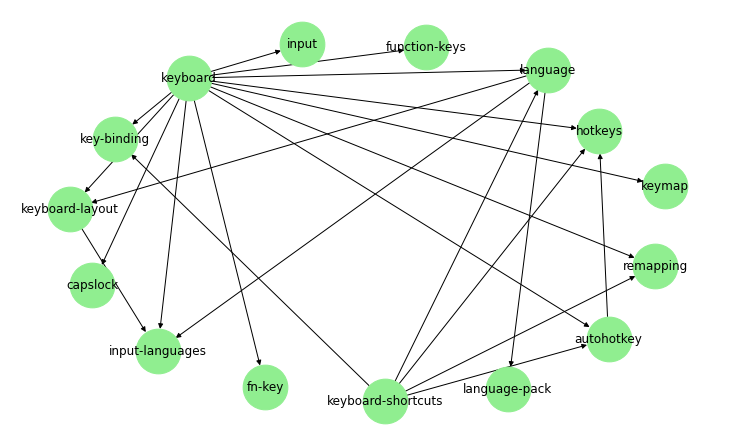

In [ ]:
from matplotlib import pyplot as plt
import pylab
# plt.rcParams["figure.figsize"] = (15,10)
# plt.tight_layout()
# plt.title('Ontology of tag communities')
# nx.draw_networkx(graph, arrows=True,node_size=400,)
pos_spaced=nx.fruchterman_reingold_layout(graph,k=200,iterations=100)
labels = nx.get_node_attributes(graph, 'size') 
plt.figure(figsize=(10,6))
nx.draw(graph,
        pos=pos_spaced,
        with_labels=True,
        node_size=2000,
        node_color='lightgreen'
       )

pylab.show()

In [ ]:
TagsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5437 non-null   int64  
 1   TagName        5437 non-null   object 
 2   Count          5437 non-null   int64  
 3   ExcerptPostId  3007 non-null   float64
 4   WikiPostId     3007 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 212.5+ KB


In [ ]:
TagsCount=TagsData[TagsData.Count<100]
TagsCount3=TagsData[(TagsData.Count>=50) & (TagsData.Count<=5000)]
TagsCount4=TagsData[TagsData.Count>30]

In [ ]:
TagsCount3

In [ ]:
TagsCount2=TagsData[TagsData.Count>100]

In [ ]:
TagsCount2

In [ ]:
Groupsdf['Entropy']=[FindEntropy(get_tagPairs(x)) for x in Groupsdf['Tags']]


In [ ]:
Groupsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nodes     1396 non-null   int64  
 1   Module    1396 non-null   object 
 2   Affinity  1396 non-null   object 
 3   Tags      1396 non-null   object 
 4   Entropy   1396 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 54.7+ KB
